In [1]:
import time
from selenium import webdriver
from selenium.webdriver import Chrome 
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
def ScrapComments(path):
  authors = []                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
  try:
    # Configuring the ChromeDriver
    options = webdriver.ChromeOptions()
    options.add_argument('-headless')
    options.add_argument('-no-sandbox')
    options.add_argument('-disable-dev-shm-usage')
    #wd = webdriver.Chrome('chromedriver',chrome_options=options)
    driver =webdriver.Chrome('chromedriver',options=options)
    wait = WebDriverWait(driver,15)
    driver.get(path)
    
    # Expanding Comments 6 times to load atleast 100 comments
    #now changed to 3
    for item in range(6):
      wait.until(EC.visibility_of_element_located((By.TAG_NAME,"body"))).send_keys(Keys.END)
      time.sleep(5)
    
    # Scrapping all the comments and their author
    for author in wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"style-scope ytd-comment-renderer"))):
      authors.append(author.text)
    
  except Exception as e:
    print(e)
  return authors
#paste input link here


path = "https://www.youtube.com/watch?v=5VYb3B1ETlk"
data = ScrapComments(path)
data

["The Haves and the Have Nots Review\n5 days ago (edited)\nThis feels like a mix between Die Hard, Iron Man 3, Home Alone & I'll Be Home For Christmas all rolled into one 😂😂😂\n24K\nREPLY",
 'Jonah Shaw\n2 days ago\nFinally...\n\n\nThe most underrated character in the MCU gets a show\n1.5K\nREPLY',
 'Tom Pinney\n2 days ago\nMarvel meets Lethal Weapon, because Barton is definitely serving “I’m too old for this shi” vibes\n369\nREPLY',
 'Yoga Malini\n1 day ago (edited)\nNATASHA:Before I was an avenger,I made lot of enemies\nCLINT: When I wore this suit,I made a whole lot of enemies\n\nEdited: I have never get likes more than 5(one from myself 😂).\nRead more\n418\nREPLY',
 'Lynne Slates\n2 days ago\n“You have arrows more dangerous than that one!?” The look on his face. XD\n152\nREPLY',
 'ImDavisss\n5 days ago\na MARVEL Christmas themed show. This looks fun\n59K\nREPLY',
 'aljohn tabion\n2 days ago\nWhen Renner got casted as Hawkeye, I was skeptical. He’s too short.. doesn’t look the part. 

In [3]:
import re
import pandas as pd
def create_df_author_comments1(data):
  author_comment = []
  author=[]
  for item in data:
    s = re.sub('\\n[0-9]+ (days|weeks|months|years|week|month|year|hours|hour|day|minutes|minute) ago' ,'',item)
    s = re.sub('\\nREPLY','',s)
    s = re.sub('\.\\n[0-9][\.]*[0-9]*[A-Z]*','',s)
    t = s.split('\n')
    t[0] = re.sub('\(edited\)','',t[0])
    author.append(t[0])
    s = "\n".join(t[1:])
    author_comment.append(s)
  df = pd.DataFrame(author_comment,index=author,columns=["Comments"])
  return df
author_comment = create_df_author_comments1(data)
author_comment

,Comments
The Haves and the Have Nots Review,"This feels like a mix between Die Hard, Iron M..."
Jonah Shaw,Finally...\n\n\nThe most underrated character ...
Tom Pinney,"Marvel meets Lethal Weapon, because Barton is ..."
Yoga Malini,"NATASHA:Before I was an avenger,I made lot of ..."
Lynne Slates,“You have arrows more dangerous than that one!...
...,...
S0LIDUS,This Christmas... Hawkeye teams up with the mo...
Abhishek Sharma,Hawkeye is the most danger an comedian in Marv...
Luciano Quezada,This just makes me feel like maybe actually ju...
中國帕特里克,Hope we get Sinatra's Christmas songs in the show


In [4]:
author_comment.head()

,Comments
The Haves and the Have Nots Review,"This feels like a mix between Die Hard, Iron M..."
Jonah Shaw,Finally...\n\n\nThe most underrated character ...
Tom Pinney,"Marvel meets Lethal Weapon, because Barton is ..."
Yoga Malini,"NATASHA:Before I was an avenger,I made lot of ..."
Lynne Slates,“You have arrows more dangerous than that one!...


In [5]:
author_comment.describe()


,Comments
count,120
unique,120
top,This feels like a James Bond movie with a slas...
freq,1


In [6]:
from textblob import TextBlob

In [7]:
def sentiment_func(Comments):
    try:
        return TextBlob(Comments).sentiment
    except:
        return None

In [8]:
author_comment['review'] = author_comment['Comments'].apply(sentiment_func)

In [9]:
author_comment.head()
#delte later

,Comments,review
The Haves and the Have Nots Review,"This feels like a mix between Die Hard, Iron M...","(-0.2916666666666667, 0.5416666666666666)"
Jonah Shaw,Finally...\n\n\nThe most underrated character ...,"(0.25, 0.75)"
Tom Pinney,"Marvel meets Lethal Weapon, because Barton is ...","(0.05, 0.35)"
Yoga Malini,"NATASHA:Before I was an avenger,I made lot of ...","(0.39999999999999997, 0.4666666666666666)"
Lynne Slates,“You have arrows more dangerous than that one!...,"(-0.125, 0.7)"


In [10]:
author_comment['review'][0][0]
author_comment['polarity'] = author_comment['review'].apply(lambda x:x[0])
author_comment['subjectivity'] = author_comment['review'].apply(lambda x:x[1])

In [11]:
author_comment.head() #delte later

,Comments,review,polarity,subjectivity
The Haves and the Have Nots Review,"This feels like a mix between Die Hard, Iron M...","(-0.2916666666666667, 0.5416666666666666)",-0.291667,0.541667
Jonah Shaw,Finally...\n\n\nThe most underrated character ...,"(0.25, 0.75)",0.250000,0.750000
Tom Pinney,"Marvel meets Lethal Weapon, because Barton is ...","(0.05, 0.35)",0.050000,0.350000
Yoga Malini,"NATASHA:Before I was an avenger,I made lot of ...","(0.39999999999999997, 0.4666666666666666)",0.400000,0.466667
Lynne Slates,“You have arrows more dangerous than that one!...,"(-0.125, 0.7)",-0.125000,0.700000


In [12]:
#move to top

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
pos=neg=neutral=0
for i in author_comment['polarity']:
    if(i==0.0):
        neutral += 1
    elif(i<0.0):
        neg+=1
    elif(i>0.0):
        pos+=1

In [14]:
author_comment.info() #delte later

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, The Haves and the Have Nots Review  to Michael Harris
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Comments      120 non-null    object 
 1   review        120 non-null    object 
 2   polarity      120 non-null    float64
 3   subjectivity  120 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.7+ KB


In [15]:
total = len(author_comment)
total

120

In [16]:
print(pos)
print(neg)
print(neutral)



77
14
29


In [17]:
def percentage(part,whole):
     return 100 * float(part)/float(whole)
pos=percentage(pos,total)
neg=percentage(neg,total)
neutral=percentage(neutral,total)

pos=format(pos, '.2f')
neg=format(neg, '.2f')
neutral=format(neutral, '.2f')

print(pos)
print(neg)
print(neutral)

64.17
11.67
24.17


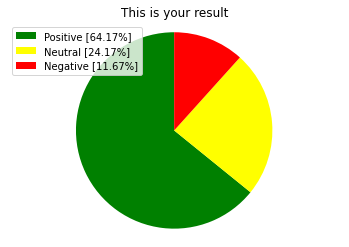

In [18]:


labels = ['Positive ['+ str(pos) +'%]','Neutral ['+ str(neutral) +'%]','Negative ['+ str(neg) +'%]']
sizes=[pos,neutral,neg]
colors = ['green','yellow','red']
patches,texts= plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("This is your result")
plt.axis('equal')
plt.show()